### Importing require Libraries


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input,Conv1D,MaxPooling1D,Dense,GlobalMaxPooling1D,Embedding
from tensorflow.keras.models import Model
import numpy as np
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

### Authentication to Google Drive Files

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Access to file

In [ ]:
# link = 'https://drive.google.com/file/d/17VnKTmYjjqYQ1WtBDIhSyEhIV6Ennu0N/view?usp=share_link
id = '17VnKTmYjjqYQ1WtBDIhSyEhIV6Ennu0N'

In [ ]:
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('FlairAnalysis.csv',)  

### Load dataset

In [ ]:
data = pd.read_csv('FlairAnalysis.csv',index_col=[0])
# Dataset is now stored in a Pandas Dataframe
data

,text,Cleaned_tweets,probability,sentiment
0,RT @StrikeMapUK: The Cost of Living Crisis is ...,cost living crisis political choice yet tory t...,0.924938,NEGATIVE
1,RT @0Calamity: This is not a #CostOfLivingCris...,costoflivingcrisis stateimposedpoverty do quit...,0.865847,POSITIVE
2,RT @geoffh33: Every non-Tory MP should have st...,every non tory mp stand today call borisjohnso...,0.987879,NEGATIVE
3,RT @hewitson10: Ian Blackford owned the show a...,ian blackford own show always tory care costof...,0.544504,NEGATIVE
4,RT @snowy2007: Serious question for Scottish P...,serious question scottish power say energy gre...,0.600847,POSITIVE
...,...,...,...,...
541723,RT @SB_Sarah10: Do you honestly think #LizTrus...,honestly think liztruss plan cost living crisis,0.993839,NEGATIVE
541724,"RT @michaelbartrum: Every hour, 10 people die ...",every hour people die poverty uk rise costofli...,0.996808,NEGATIVE
541725,Jesus! £170 billion excess profits over 2 yrs!...,jesus billion excess profit yrs time take stre...,0.689607,NEGATIVE
541726,RT @maxwellwoodger: Attended the Final @Conser...,attend final leadership debate uk husting fell...,0.690461,NEGATIVE


Create copy of dataset 

In [ ]:
newdata = data.copy()
newdata

,text,Cleaned_tweets,probability,sentiment
0,RT @StrikeMapUK: The Cost of Living Crisis is ...,cost living crisis political choice yet tory t...,0.924938,NEGATIVE
1,RT @0Calamity: This is not a #CostOfLivingCris...,costoflivingcrisis stateimposedpoverty do quit...,0.865847,POSITIVE
2,RT @geoffh33: Every non-Tory MP should have st...,every non tory mp stand today call borisjohnso...,0.987879,NEGATIVE
3,RT @hewitson10: Ian Blackford owned the show a...,ian blackford own show always tory care costof...,0.544504,NEGATIVE
4,RT @snowy2007: Serious question for Scottish P...,serious question scottish power say energy gre...,0.600847,POSITIVE
...,...,...,...,...
541723,RT @SB_Sarah10: Do you honestly think #LizTrus...,honestly think liztruss plan cost living crisis,0.993839,NEGATIVE
541724,"RT @michaelbartrum: Every hour, 10 people die ...",every hour people die poverty uk rise costofli...,0.996808,NEGATIVE
541725,Jesus! £170 billion excess profits over 2 yrs!...,jesus billion excess profit yrs time take stre...,0.689607,NEGATIVE
541726,RT @maxwellwoodger: Attended the Final @Conser...,attend final leadership debate uk husting fell...,0.690461,NEGATIVE


Convert sentiment Positve or Negative to binary 1 or 0

In [ ]:
newdata['new_sentiment'] = newdata['sentiment'].apply(lambda x: 1 if x=='POSITIVE' else 0)
newdata = newdata.loc[:, ['Cleaned_tweets', 'new_sentiment']]
newdata

,Cleaned_tweets,new_sentiment
0,cost living crisis political choice yet tory t...,0
1,costoflivingcrisis stateimposedpoverty do quit...,1
2,every non tory mp stand today call borisjohnso...,0
3,ian blackford own show always tory care costof...,0
4,serious question scottish power say energy gre...,1
...,...,...
541723,honestly think liztruss plan cost living crisis,0
541724,every hour people die poverty uk rise costofli...,0
541725,jesus billion excess profit yrs time take stre...,0
541726,attend final leadership debate uk husting fell...,0


### Build the Model

In [ ]:
y=newdata['new_sentiment']

Train and split the data using 30% 

In [ ]:

newdata_train,newdata_test,y_train,y_test=train_test_split(newdata['Cleaned_tweets'],y,test_size=0.30,random_state=42)
print('Data Train Shape: ',newdata_train.shape)
print('Data Test Shape: ',newdata_test.shape)
print('Y Train Shape: ',y_train.shape)
print('Y Test Shape: ',y_test.shape)

Data Train Shape:  (379058,)
Data Test Shape:  (162454,)
Y Train Shape:  (379058,)
Y Test Shape:  (162454,)


In [ ]:
max_words=5000
tokenizer=Tokenizer(max_words)
tokenizer.fit_on_texts(newdata_train)
sequence_train=tokenizer.texts_to_sequences(newdata_train)
sequence_test=tokenizer.texts_to_sequences(newdata_test)

In [ ]:
word2vec=tokenizer.word_index
V=len(word2vec)
print('dataset has %s number of independent tokens' %V)

dataset has 67055 number of independent tokens


In [ ]:
newdata_train=pad_sequences(sequence_train)
newdata_train.shape

(379058, 36)

In [ ]:
T=newdata_train.shape[1]
newdata_test=pad_sequences(sequence_test,maxlen=T)
newdata_test.shape

(162454, 36)

In [ ]:
D=20
i=Input((T,))
x=Embedding(V+1,D)(i)
x=Conv1D(32,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(64,3,activation='relu')(x)
x=MaxPooling1D(3)(x)
x=Conv1D(128,3,activation='relu')(x)
x=GlobalMaxPooling1D()(x)
x=Dense(5,activation='softmax')(x)
model=Model(i,x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 36)]              0         
                                                                 
 embedding (Embedding)       (None, 36, 20)            1341120   
                                                                 
 conv1d (Conv1D)             (None, 34, 32)            1952      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 11, 32)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 9, 64)             6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 3, 64)            0         
 1D)                                                         

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn_senti=model.fit(newdata_train,y_train,validation_data=(newdata_test,y_test),epochs=5,batch_size=100)

Epoch 1/5
3791/3791 [==============================] - 58s 15ms/step - loss: 0.3175 - accuracy: 0.8612 - val_loss: 0.2575 - val_accuracy: 0.8900
Epoch 2/5
3791/3791 [==============================] - 51s 13ms/step - loss: 0.2212 - accuracy: 0.9069 - val_loss: 0.2428 - val_accuracy: 0.8995
Epoch 3/5
3791/3791 [==============================] - 54s 14ms/step - loss: 0.1875 - accuracy: 0.9220 - val_loss: 0.2361 - val_accuracy: 0.9042
Epoch 4/5
3791/3791 [==============================] - 54s 14ms/step - loss: 0.1650 - accuracy: 0.9317 - val_loss: 0.2428 - val_accuracy: 0.9031
Epoch 5/5
3791/3791 [==============================] - 59s 16ms/step - loss: 0.1486 - accuracy: 0.9386 - val_loss: 0.2527 - val_accuracy: 0.9067


In [ ]:
y_pred=model.predict(newdata_test)
y_pred

5077/5077 [==============================] - 8s 2ms/step


array([[9.98862803e-01, 1.13711425e-03, 6.56481957e-21, 3.09484553e-20,
        5.73748184e-21],
       [9.95090008e-01, 4.90993960e-03, 1.61958097e-18, 6.00337290e-18,
        1.33373609e-18],
       [8.26010764e-01, 1.73989162e-01, 1.83608389e-11, 4.93514292e-11,
        2.05740321e-11],
       ...,
       [9.98710155e-01, 1.28988840e-03, 5.08361092e-21, 2.48561134e-20,
        5.71679142e-21],
       [9.99547899e-01, 4.52073815e-04, 2.06504396e-25, 1.24493453e-24,
        1.32541217e-25],
       [9.99899507e-01, 1.00526806e-04, 9.59404409e-28, 9.78693195e-27,
        1.32394636e-27]], dtype=float32)

In [ ]:
y_pred=np.argmax(y_pred,axis=1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

### Evaluating the Model

In [ ]:
accuracy_score = metrics.accuracy_score(y_test,y_pred)
precision_score = metrics.precision_score(y_test,y_pred)
recall_score = metrics.recall_score(y_test,y_pred)

In [ ]:
print("Accuracy:",str('{:04.2f}'.format(accuracy_score*100))+'%')
print("Precision:",str('{:04.2f}'.format(precision_score*100))+'%')
print("Recall:",str('{:04.2f}'.format(recall_score*100))+'%')

Accuracy: 90.67%
Precision: 85.15%
Recall: 84.56%


In [ ]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[104838,   7404],
       [  7753,  42459]])

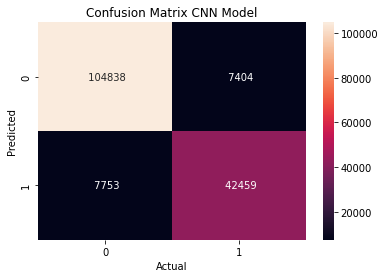

In [ ]:
ax=sns.heatmap(cm,annot=True,cmap='rocket',fmt=' ')
ax.set_title('Confusion Matrix CNN Model')
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.savefig('CNN_Model.png', dpi=1080, format='png')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93    112242
           1       0.85      0.85      0.85     50212

    accuracy                           0.91    162454
   macro avg       0.89      0.89      0.89    162454
weighted avg       0.91      0.91      0.91    162454



In [ ]:
# x axis is the actual value/data
# y axis is the predicted value/data